6    서울특별시 동대문구 (1123000000)
Name: 행정구역, dtype: object


/Users/jameslee/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 44305 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/jameslee/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 51652 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/jameslee/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/jameslee/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 49436 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/jameslee/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 50872 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/jameslee/opt/anaconda3/lib/python3.8/site-p

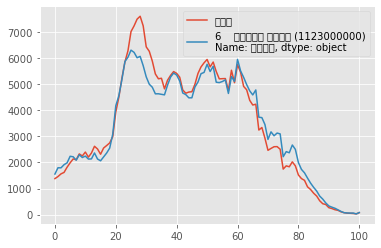

In [145]:
import matplotlib.pyplot as plt
import pandas
import numpy as np
from matplotlib import font_manager

data = pandas.read_csv('./peopledata.csv', encoding='euc-kr')
sum = 0
resultSum = 9999999999
resultIndex = 0
cityB = []
cityAVal = []
cityBVal = []
cityName = []
A = 5

tmp = data.loc[[5], '2021년05월_계_0세':'2021년05월_계_100세 이상']
cityA = tmp.values.tolist()

for a in cityA[0]:
    cityAVal.append(int(str(a).replace(',', '')))
    cityBVal.append(0)
    
for i in range(1, 26):
    if i == A:
        cityName.append(data.loc[[i], '행정구역'])
        continue
    cityB = data.loc[[i], '2021년05월_계_0세':'2021년05월_계_100세 이상'].values.tolist()
    cityName.append(data.loc[[i], '행정구역'])
    
    k=0
    for a in cityB[0]:
        cityBVal[k] = (int(str(a).replace(',', '')))
        k += 1

    
    for j in range(0, 101):
        sum += (cityAVal[j] - cityBVal[j]) ** 2

    if resultSum > sum:
        resultSum = sum
        resultIndex = i
    sum = 0
    
k = 0
cityB = data.loc[[resultIndex], '2021년05월_계_0세':'2021년05월_계_100세 이상'].values.tolist()
for a in cityB[0]:
        cityBVal[k] = (int(str(a).replace(',', '')))
        k += 1

print(cityName[resultIndex-1])

plt.style.use('ggplot')
plt.plot(cityAVal, label = '광진구')
plt.plot(cityBVal, label = cityName[resultIndex-1])
plt.legend()
plt.show()